In [35]:
from os import getcwd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, Adamax
import pandas as pd
from PIL import Image


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("/content/sample_data/mnist_test.csv")
df.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,4.443144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179318,0.163616,0.052605,0.000600,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674433,5.736359,2.420125,0.060003,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


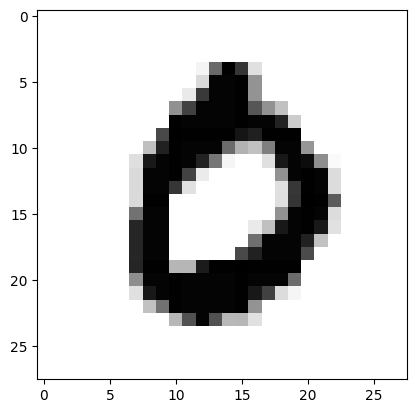

In [ ]:
img = df.iloc[2,:]
imgvw = np.array(img[1:]).reshape(28,-1)
plt.imshow(imgvw, cmap='gray_r')
plt.show()

#Binary Classification

In [4]:
df_0 = df[df['7'] == 0]
df_1 = df[df['7'] == 1]

df_0.append(df_1, ignore_index=True)
df_01 = pd.concat([df_0, df_1], axis=0, ignore_index=True)
df_01 = df_01.sample(frac=1, random_state=123)
df_01.head()

<ipython-input-4-d5bc99ec6fed>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_0.append(df_1, ignore_index=True)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
2002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1113,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df_01.drop(axis=1, labels=['7'])
Y = df_01['7']
X.shape, Y.shape

((2115, 784), (2115,))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=424)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1797, 784), (318, 784), (1797,), (318,))

In [21]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='linear')
])
model.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(0.001), metrics= ['acc'])

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
57/57 [==============================] - 1s 2ms/step - loss: 0.5149 - acc: 0.9822
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.0034 - acc: 0.9994
Epoch 3/50
57/57 [==============================] - 0s 2ms/step - loss: 5.5306e-04 - acc: 1.0000
Epoch 4/50
57/57 [==============================] - 0s 2ms/step - loss: 8.4106e-04 - acc: 0.9994
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 2.2741e-06 - acc: 1.0000
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 1.9494e-06 - acc: 1.0000
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 1.8336e-06 - acc: 1.0000
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 1.7226e-06 - acc: 1.0000
Epoch 9/50
57/57 [==============================] - 0s 2ms/step - loss: 1.6235e-06 - acc: 1.0000
Epoch 10/50
57/57 [==============================] - 0s 2ms/step - loss: 1.5175e-06 - acc: 1.0000
Epoch 11/50
57/57 [==================

In [22]:
yhat_test = tf.nn.sigmoid(model.predict(x_test))
yhat_train = tf.nn.sigmoid(model.predict(x_train))
yhat_test = np.where(yhat_test > 0.5, 1, 0)
yhat_train = np.where(yhat_train > 0.5, 1, 0)

57/57 [==============================] - 0s 1ms/step


In [23]:
accuracy_score(y_test, yhat_test), accuracy_score(y_train, yhat_train)

(1.0, 1.0)

# Multiclass Classification

In [19]:
X_mult = df.drop(axis=1, labels=['7'])
Y_mult = df['7']
X_mult.shape, Y_mult.shape

((9999, 784), (9999,))

In [24]:
x_mult_train, x_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult,Y_mult, test_size=0.3, random_state=424)
x_mult_train.shape, x_mult_test.shape, y_mult_train.shape, y_mult_test.shape

((6999, 784), (3000, 784), (6999,), (3000,))

## DNN

In [ ]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='softmax')
])
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(0.001), metrics= ['acc'])

model.fit(x_mult_train, y_mult_train, epochs=50)

In [30]:
def fromProbToLable(y_hat):
  y_hat_lable = np.empty(y_hat.shape[0]).astype('int64')
  for i in range(len(y_hat)):
    y_hat_lable[i] = np.round(np.argmax(y_hat[i]))
  return y_hat_lable

In [31]:
yhat_mult_test = tf.nn.softmax(model.predict(x_mult_test))
yhat_mult_train = tf.nn.softmax(model.predict(x_mult_train))

yhat_mult_test = fromProbToLable(yhat_mult_test)
yhat_mult_train = fromProbToLable(yhat_mult_train)

219/219 [==============================] - 0s 1ms/step


In [32]:
#little bit overfit :(
accuracy_score(y_mult_train, yhat_mult_train), accuracy_score(y_mult_test, yhat_mult_test)


(0.8313333333333334, 0.8822688955565081)

## LeNet - 5

In [79]:
x_mult_train = np.array(x_mult_train)
x_mult_test = np.array(x_mult_test)
x_mult_train = x_mult_train.reshape(-1,28,28,1)
x_mult_test = x_mult_test.reshape(-1,28,28,1)

x_mult_train.shape, x_mult_test.shape, y_mult_train.shape, y_mult_test.shape

((6999, 28, 28, 1), (3000, 28, 28, 1), (6999,), (3000,))

In [82]:
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    Conv2D(6, kernel_size=(5,5), activation='tanh', padding='same', strides=(1,1)),
    AveragePooling2D(pool_size = (2, 2), strides=2, padding='valid', ),

    Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid', strides=(1,1)),
    AveragePooling2D(pool_size = (2, 2), strides=2, padding='valid'),

    Flatten(),

    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=10, activation='softmax')
])
model.summary()


Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_44 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_46 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_45 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_22 (Flatten)        (None, 400)               0         
                                                                 
 dense_102 (Dense)           (None, 120)             

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(0.001), metrics= ['acc'])
model.fit(x_mult_train, y_mult_train, epochs=20)

In [77]:
yhat_mult_test = model.predict(x_mult_test)
yhat_mult_train = model.predict(x_mult_train)

yhat_mult_test = fromProbToLable(yhat_mult_test)
yhat_mult_train = fromProbToLable(yhat_mult_train)

219/219 [==============================] - 3s 15ms/step


In [78]:
accuracy_score(y_mult_train, yhat_mult_train), accuracy_score(y_mult_test, yhat_mult_test)

(1.0, 0.9856666666666667)